In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_boston

In [28]:
boston = load_boston()

In [29]:
X = boston['data']
y = boston['target']

In [30]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [31]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
X.shape

(506, 13)

In [33]:
y.shape

(506,)

In [34]:
df = pd.DataFrame(X, columns= boston.feature_names)

In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Preprocess - Standardization

In [36]:
mu = X.mean(axis=0)
sig = X.std(axis=0)

In [37]:
# std => 1 , mean=> 0
X = (X - mu)/sig

In [38]:
X = np.hstack( (np.ones((X.shape[0],1)) , X)  )

In [39]:
X.shape

(506, 14)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y = y.reshape(y.shape[0], 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multivariate Linear Reg

In [43]:
def hypothesis(X, theta):
    """
    X - np array (m,n+1)
    theta - np arrary (n+1, 1)
    """
    return np.dot(X,theta)

In [44]:
def error(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    
    return :
        scalar value = loss value
    """

    
    y_hat = hypothesis(X, theta) # (m,1)
    err = np.mean( (y_hat - y )**2 )
    
    return err

In [45]:
def gradient(X, y, theta):
    """
    X - np array (m,n+1)
    y - np array (m, 1)
    theta - np arrary (n+1, 1)
    """
    

    
    y_hat = hypothesis(X, theta)
    grad = np.dot( X.T , (y_hat - y) )
   
    return grad/X.shape[0]

In [46]:
def gradient_descent(X, y, lr =0.1, max_itr = 100):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        # Updation Rule
        theta = theta - lr*grad
        
    return (theta, error_list)

In [47]:
st = time.time()
opt_theta, error_list = gradient_descent(X_train, y_train)
end = time.time()
print("total time taken ", end-st)

total time taken  0.010027408599853516


In [48]:
opt_theta.shape

(14, 1)

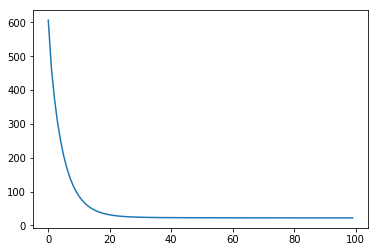

In [49]:
plt.plot(error_list)

In [50]:
y_pred = hypothesis(X_test, opt_theta)

In [51]:
def r2_score(Y, Y_):
    """
    calculate r2 score on y_hat and Y
    """
    num = np.sum((Y - Y_)**2)
    denom = np.sum( (Y - Y.mean() )**2 )
    
    score = 1 - (num/denom)
    
    return score

In [52]:
r2_score(y_test, y_pred)

0.6536437704407978

# from sklearn 

In [161]:
# import 
from sklearn.linear_model import LinearRegression


# object
model = LinearRegression()

In [162]:
# training - > fit

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
model.score(X_test, y_test)

0.6687594935356318

In [164]:
model.score(X_train, y_train)

0.7508856358979673

In [165]:
model.intercept_

array([22.48526824])

In [166]:
model.coef_

array([[ 0.        , -0.97149423,  0.70155562,  0.27675212,  0.70653152,
        -1.99143043,  3.11571836, -0.17706021, -3.04577065,  2.28278471,
        -1.79260468, -1.97995351,  1.12649864, -3.62814937]])